# Libraries used for Reqression Tree and Random Forest

In [2]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

## Regression Library
from sklearn.tree import DecisionTreeRegressor

## Classificaton Library

from sklearn import tree
from sklearn.metrics import accuracy_score


import graphviz 
from matplotlib import pyplot as plt


# Prepare Dataset for sklearn Library

In [3]:
data_test=pd.read_csv("validationData.csv")

data_train=pd.read_csv("trainingData.csv")

In [19]:
data_train.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


# Creating the Features and Split x,y for the Train and Test (validation)

In [5]:
x_test= data_test
y_test_LATITUDE= data_test['LATITUDE']
y_test_LONGITUDE= data_test['LONGITUDE']

x_train= data_train
y_train_LATITUDE= data_train['LATITUDE']
y_train_LONGITUDE= data_train['LONGITUDE']

#  Regression Tree
### using Regression Tree to predict the Latitude and Longitute
## Fitting the tree (LATITUDE)

In [1]:
#  Regression Tree
### using Regression Tree to predict the Latitude and Longitute
## Fitting the tree (LATITUDE)

In [6]:
Tree_reg=DecisionTreeRegressor()
reg_Tree_LATITUDE= Tree_reg.fit(x_train,y_train_LATITUDE)
y_pred= reg_Tree_LATITUDE.predict(x_test)

## Checking the Validation (LATITUDE)

In [7]:
#the vaildation of the Tree
print("Regression Tree vailidation: {}%".format(reg_Tree_LATITUDE.score(x_test,y_test_LATITUDE)*100))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_LATITUDE, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test_LATITUDE, y_pred)) 


Regression Tree vailidation: 99.97970009418758%
Mean squared error: 1.00
Variance score: 1.00


## Fitting the tree (LONGITUDE)

In [8]:
reg_Tree_LONGITUDE= Tree_reg.fit(x_train,y_train_LONGITUDE)
y_pred= reg_Tree_LONGITUDE.predict(x_test)

## Checking the Validation (LONGITUDE)

In [9]:
#the vaildation of the Tree
print("Regression Tree vailidation: {}%".format(reg_Tree_LONGITUDE.score(x_test,y_test_LONGITUDE)*100))
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_LONGITUDE, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test_LONGITUDE, y_pred))

Regression Tree vailidation: 99.99229102949006%
Mean squared error: 1.11
Variance score: 1.00


## Classification
### using classification to predict the building and the floor

In [10]:
treecl=tree.DecisionTreeClassifier()
y_train_class=data_train[['BUILDINGID','FLOOR']]

## Fitting the tree

In [11]:
treeclas=treecl.fit(x_train,y_train_class)

## Predict 

In [12]:
Y_p=treeclas.predict(x_test)
y_test_building=data_test['BUILDINGID']
y_test_floor=data_test['FLOOR']


## Checking the Validation (Floor)

In [13]:
print("Classifier Tree vailidation (Floor):" ) 
accuracy_score(y_test_floor,Y_p[:,1])*100


Classifier Tree vailidation (Floor):


100.0

## Checking the Validation (Building)

In [14]:
print("Classifier Tree vailidation: (Building)" ) 
accuracy_score(y_test_building,Y_p[:,0])*100

Classifier Tree vailidation: (Building)


51.755175517551756

In [15]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

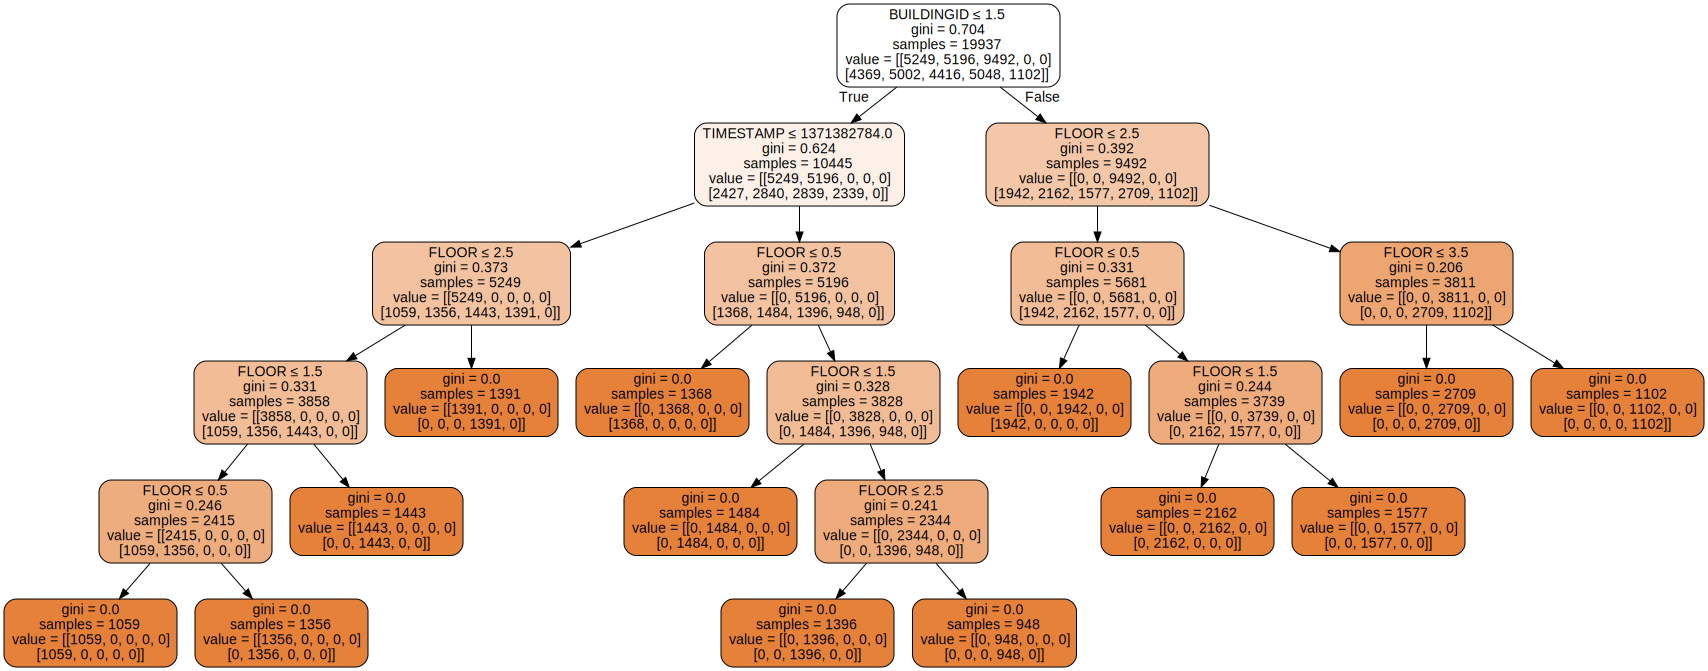

In [16]:


##dot_data = tree.export_graphviz(treecl, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph.render()

dot_data = tree.export_graphviz(treecl, out_file=None, 
                     feature_names=list(x_train.columns),  
                    ## class_names='BUILDINGID',  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.format = 'png'
graph.render('classification DTree',view=True)
graph

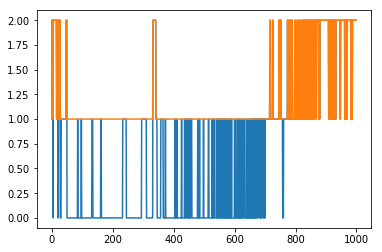

In [18]:
plt.plot(y_test_building[:1000])
plt.plot(Y_p[:1000,0])